<a href="https://colab.research.google.com/github/Biyani404198/News-Recommendation-System/blob/main/News_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## load the data

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# load the platform_content dataset
platform_df = pd.read_csv('/content/drive/MyDrive/platform_content.csv')

In [ ]:
# load the consumer_transactionst dataset
consumer_df = pd.read_csv('/content/drive/MyDrive/consumer_transanctions.csv')

<ipython-input-4-faf7740bcb1d>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  consumer_df = pd.read_csv('/content/drive/MyDrive/consumer_transanctions.csv')


In [ ]:
# check duplicate rows
consumer_df.duplicated().sum()

11

In [ ]:
# remove duplicate rows
consumer_df.drop_duplicates(inplace=True)

## EDA

In [ ]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72301 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72301 non-null  int64 
 1   interaction_type      72301 non-null  object
 2   item_id               72301 non-null  int64 
 3   consumer_id           72301 non-null  int64 
 4   consumer_session_id   72301 non-null  object
 5   consumer_device_info  56907 non-null  object
 6   consumer_location     56896 non-null  object
 7   country               56907 non-null  object
dtypes: int64(3), object(5)
memory usage: 5.0+ MB


In [ ]:
def create_countplot_with_others(data, column, threshold, figsize=(6, 4)):
    """
    Create a countplot for a categorical column, grouping categories below the threshold as 'Others'.

    Args:
        data (DataFrame): The DataFrame containing the data.
        column (str): The name of the categorical column to plot.
        threshold (int): The threshold to determine the top categories.
        figsize (tuple): The size of the figure (width, height).

    Returns:
        None
    """
    # Get value counts for the specified column
    value_counts = data[column].value_counts()

    # Create a new Series with the top categories and 'Others'
    grouped_counts = value_counts[value_counts >= threshold]
    grouped_counts['Others'] = value_counts[value_counts < threshold].sum()

    # Create a countplot
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=column, order=grouped_counts.index)

    # Set labels for the 'Others' category
    for i in range(len(grouped_counts)):
        ax.text(i, grouped_counts[i], grouped_counts[i], ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Countplot')
    plt.show()

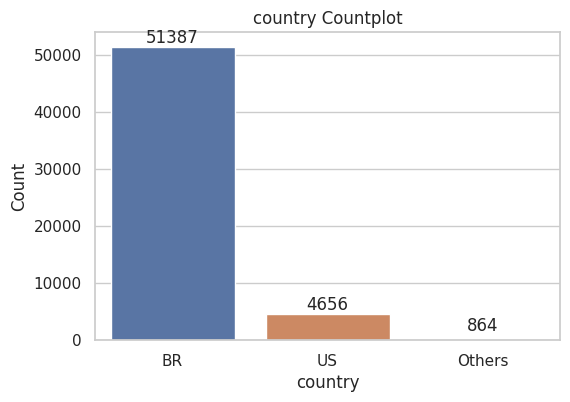

In [ ]:
# plot country

create_countplot_with_others(consumer_df, 'country', 400)

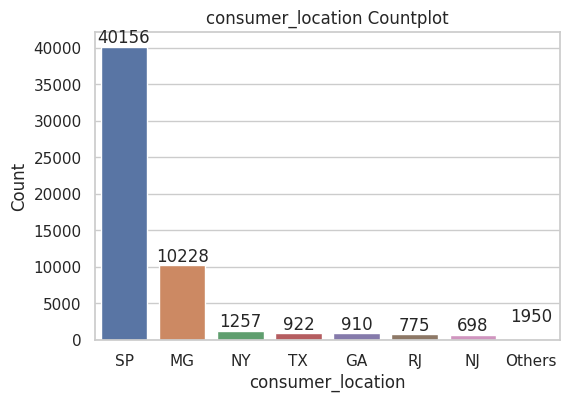

In [ ]:
# plot consumer_location

create_countplot_with_others(consumer_df, 'consumer_location', 500)

In [ ]:
platform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


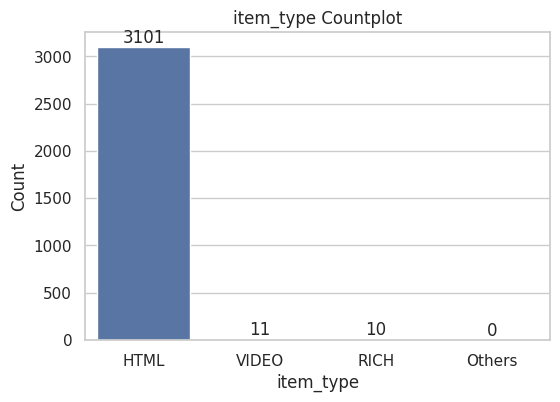

In [ ]:
# countplot the item_type
create_countplot_with_others(platform_df, 'item_type', 10)

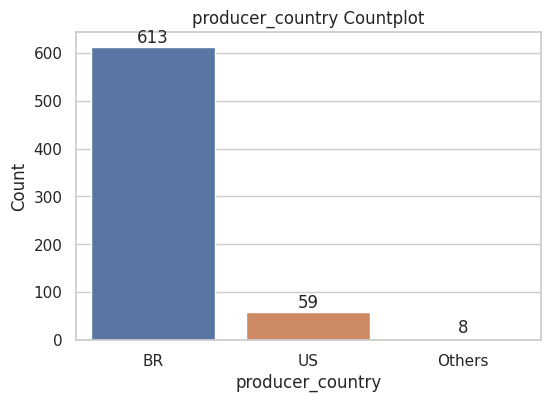

In [ ]:
# countplot the producer_country
create_countplot_with_others(platform_df, 'producer_country', 10)

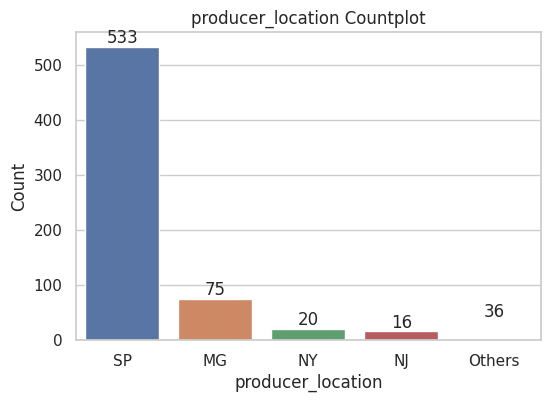

In [ ]:
# countplot the prodcuer_location
create_countplot_with_others(platform_df, 'producer_location', 10)

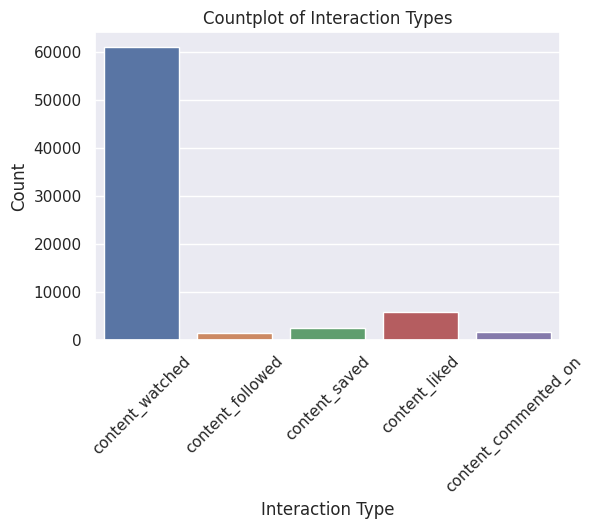

In [ ]:
# Create a countplot for the 'interaction_type' column
plt.figure(figsize=(6,4))  # Adjust the figure size as needed
sns.countplot(data=consumer_df, x='interaction_type')
plt.title('Countplot of Interaction Types')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

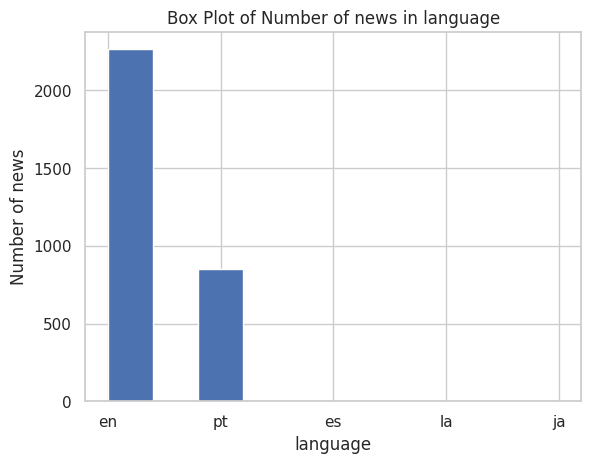

In [ ]:
# plot language count
plt.hist(platform_df['language'])
# Set labels and title
plt.xlabel('language')
plt.ylabel('Number of news')
plt.title('Box Plot of Number of news in language')

# Show the plot
plt.show()

## Content Based Filtering

#### Data Analysis

In [ ]:
# check columns in dataframe
platform_df.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language'],
      dtype='object')

In [ ]:
# check dataframe info
platform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [ ]:
# count of news present in different languages
platform_df['language'].value_counts()

en    2264
pt     850
la       4
es       2
ja       2
Name: language, dtype: int64

In [ ]:
# platform dataframe keeping the news in english language only
platform = platform_df[~(platform_df['language']!='en')]

In [ ]:
platform['interaction_type'].value_counts()

content_present       2211
content_pulled_out      53
Name: interaction_type, dtype: int64

In [ ]:
# keep the content that was already present on platform and was not pulled out
platform = platform[~(platform['interaction_type']!='content_present')]

In [ ]:
# filter the columns to keep
useful_cols = ['title','text_description']
discard_cols = list(set(platform.columns) - set(useful_cols))

In [ ]:
# remove columns which are not required from platform dataframe
platform.drop(columns=discard_cols,axis=1,inplace=True)

In [ ]:
platform.columns

Index(['title', 'text_description'], dtype='object')

In [ ]:
# check for duplicate rows using text_description as title can be repeated with different text_description
len(platform['text_description'])-(platform['text_description'].nunique())

30

In [ ]:
# drop duplicate rows keeping single copy
platform = platform.drop_duplicates(subset='text_description', keep='first')

In [ ]:
# check for duplicate rows using text_description as title can be repeated with different text_description
len(platform['text_description'])-(platform['text_description'].nunique())

0

In [ ]:
# check length of text_description for each news
platform['text_description'].str.len()

1        6543
2        1993
3        1520
4        8093
5        1824
        ...  
3116     1006
3118     1703
3119    16970
3120     6530
3121      346
Name: text_description, Length: 2181, dtype: int64

In [ ]:
# create dataframe with text_description as only column
description=pd.DataFrame(platform['text_description'])

In [ ]:
# remove punctuations from text and lowercase
import string
punct=string.punctuation

def remove_punct(text):
  text = text.translate(str.maketrans('','',punct))
  return text.lower()

description['wo_punct']=platform['text_description'].apply(lambda text:remove_punct(text))

In [ ]:
description.head()

text_description  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure. "Ethereum is a general platform where you can solve problems in many industries using a fairly elegant solution - the most elegant solution we have seen to date," said Marley Gray, a director of business development and strategy at Microsoft. Mr. Gray is responsible for Microsoft's work with blockchains, the database concept that Bitcoin introduced. Blockchains are designed to store transactions and data without requiring any central authority or repository. Blockchain ledgers are generally maintained and updated by networks of computers working together - somewhat similar to the way that Wikipedia is updated and maintained by all its users. Many corporations, though, have created their own Ethereum networks with private blockchains, independent of the public system, and that could ultimately detract from the value of the individual unit in the Ethereum system - known as an Ether - that people have recently been buying. The interest in Ethereum is one sign of the corporate fascination with blockchains. Most major banks have expressed an interest in using them to make trading and money transfer faster and more efficient. On Tuesday, executives from the largest banks will gather for a conference, "Blockchain: Tapping I nto the Real Potential , Cutting Through the Hype." Many of these banks have recently been looking at how some version of Ethereum might be put to use. JPMorgan, for instance, has created a spec

In [ ]:
# remove stopwords from text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  # Join the tokens into a single string
  text = ' '.join(tokens)
  return text

description['wo_stopwords']=description['wo_punct'].apply(lambda text:remove_stopwords(text))

In [ ]:
description.head()

text_description  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure. "Ethereum is a general platform where you can solve problems in many industries using a fairly elegant solution - the most elegant solution we have seen to date," said Marley Gray, a director of business development and strategy at Microsoft. Mr. Gray is responsible for Microsoft's work with blockchains, the database concept that Bitcoin introduced. Blockchains are designed to store transactions and data without requiring any central authority or repository. Blockchain ledgers are generally maintained and updated by networks of computers working together - somewhat similar to the way that Wikipedia is updated and maintained by all its users. Many corporations, though, have created their own Ethereum networks with private blockchains, independent of the public system, and that could ultimately detract from the value of the individual unit in the Ethereum system - known as an Ether - that people have recently been buying. The interest in Ethereum is one sign of the corporate fascination with blockchains. Most major banks have expressed an interest in using them to make trading and money transfer faster and more efficient. On Tuesday, executives from the largest banks will gather for a conference, "Blockchain: Tapping I nto the Real Potential , Cutting Through the Hype." Many of these banks have recently been looking at how some version of Ethereum might be put to use. JPMorgan, for instance, has created a spec

In [ ]:
# create list of word count in each processed description
keywords_num=[]
for desc in description['wo_stopwords']:
  word_len = len(desc.split(' '))
  keywords_num.append(word_len)

In [ ]:
print(keywords_num)

[605, 201, 152, 733, 165, 363, 408, 941, 481, 1128, 2425, 164, 1240, 566, 485, 122, 336, 571, 299, 515, 151, 172, 456, 307, 372, 100, 787, 226, 268, 212, 1827, 714, 446, 223, 1172, 283, 1172, 232, 379, 810, 353, 191, 2390, 431, 237, 510, 335, 174, 621, 769, 334, 162, 311, 388, 759, 170, 358, 496, 257, 801, 202, 323, 705, 104, 121, 152, 113, 417, 546, 990, 3962, 545, 3992, 366, 1599, 80, 481, 971, 141, 390, 198, 254, 714, 372, 423, 32, 43, 115, 452, 388, 363, 148, 531, 465, 406, 388, 602, 36, 238, 54, 597, 174, 259, 511, 313, 475, 504, 145, 284, 280, 1442, 521, 1377, 94, 591, 861, 127, 198, 721, 255, 311, 393, 143, 166, 117, 1505, 441, 2580, 152, 641, 209, 494, 570, 390, 567, 955, 306, 403, 491, 179, 529, 371, 1768, 140, 437, 567, 257, 193, 82, 238, 396, 272, 187, 276, 207, 291, 364, 350, 179, 227, 229, 98, 366, 375, 54, 256, 413, 1690, 536, 1213, 196, 877, 318, 276, 771, 935, 237, 409, 379, 629, 1157, 143, 626, 442, 668, 990, 939, 505, 496, 645, 318, 532, 609, 597, 242, 663, 89, 248, 1

In [ ]:
len(keywords_num)

2181

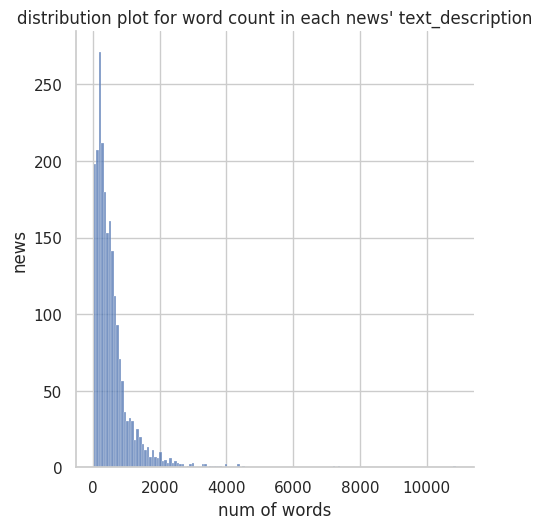

In [ ]:
# plot word count
sns.displot(keywords_num)
# Set labels and title
plt.xlabel('num of words')
plt.ylabel('news')
plt.title("distribution plot for word count in each news' text_description")

# Show the plot
plt.show()

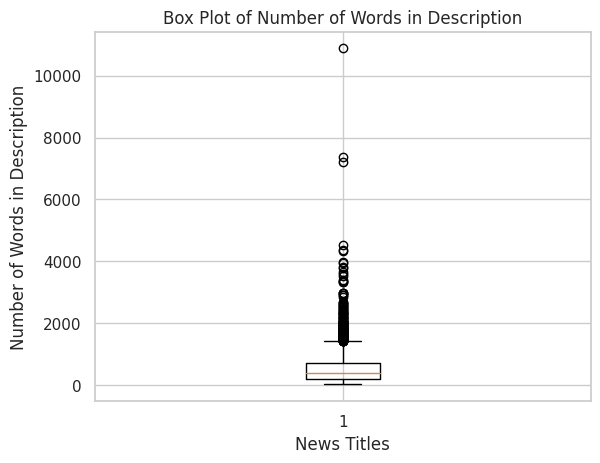

In [ ]:
# Number of words in each text_description
plt.boxplot(keywords_num)

# Set labels and title
plt.xlabel('News Titles')
plt.ylabel('Number of Words in Description')
plt.title('Box Plot of Number of Words in Description')

# Show the plot
plt.show()

In [ ]:
# create array from processed description
desc_array = description['wo_stopwords'].to_numpy()
desc_array

array(['work still early first full public version ethereum software recently released system could face technical legal problems tarnished bitcoin many bitcoin advocates say ethereum face security problems bitcoin greater complexity software thus far ethereum faced much less testing many fewer attacks bitcoin novel design ethereum may also invite intense scrutiny authorities given potentially fraudulent contracts like ponzi schemes written directly ethereum system sophisticated capabilities system made fascinating executives corporate america ibm said last year experimenting ethereum way control real world objects socalled internet things microsoft working several projects make easier use ethereum computing cloud azure ethereum general platform solve problems many industries using fairly elegant solution elegant solution seen date said marley gray director business development strategy microsoft mr gray responsible microsofts work blockchains database concept bitcoin introduced blockc

#### Generate words from desc_array

In [ ]:
# create list of word list for each description
words_list = []
for keyword in desc_array:
    splitted_words = keyword.split(' ')
    words_list.append(splitted_words)

In [ ]:
print(str(len(words_list))+','+str(len(words_list[0]))+','+str(len(words_list[2])))
print(words_list[0])

2181,605,152
['work', 'still', 'early', 'first', 'full', 'public', 'version', 'ethereum', 'software', 'recently', 'released', 'system', 'could', 'face', 'technical', 'legal', 'problems', 'tarnished', 'bitcoin', 'many', 'bitcoin', 'advocates', 'say', 'ethereum', 'face', 'security', 'problems', 'bitcoin', 'greater', 'complexity', 'software', 'thus', 'far', 'ethereum', 'faced', 'much', 'less', 'testing', 'many', 'fewer', 'attacks', 'bitcoin', 'novel', 'design', 'ethereum', 'may', 'also', 'invite', 'intense', 'scrutiny', 'authorities', 'given', 'potentially', 'fraudulent', 'contracts', 'like', 'ponzi', 'schemes', 'written', 'directly', 'ethereum', 'system', 'sophisticated', 'capabilities', 'system', 'made', 'fascinating', 'executives', 'corporate', 'america', 'ibm', 'said', 'last', 'year', 'experimenting', 'ethereum', 'way', 'control', 'real', 'world', 'objects', 'socalled', 'internet', 'things', 'microsoft', 'working', 'several', 'projects', 'make', 'easier', 'use', 'ethereum', 'computing

In [ ]:
platform['keywords'] = [','.join(words) for words in words_list]
platform['keywords'] = platform['keywords'].str.strip()

In [ ]:
platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 1 to 3121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2181 non-null   object
 1   text_description  2181 non-null   object
 2   keywords          2181 non-null   object
dtypes: object(3)
memory usage: 68.2+ KB


In [ ]:
platform.columns

Index(['title', 'text_description', 'keywords'], dtype='object')

#### Create Dictionary

In [ ]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(words_list)

In [ ]:
# print number of words in word_list and in dictionary created
number_words = 0
for word in words_list:
    number_words = number_words + len(word)
print(number_words)
print(len(dictionary))

1233245
59479


In [ ]:
# print dictionary words using id
dictionary.get(0), dictionary.get(1), dictionary.get(100), dictionary.get(1000)

('1', '10', 'development', 'shift')

#### Generate BOW corpus

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in words_list]

In [ ]:
len(corpus), len(corpus[0]), len(corpus[1])

(2181, 395, 171)

#### Create TF-IDF Model

In [ ]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

In [ ]:
tfidf[corpus[0]]

[(0, 0.01768547159950448),
 (1, 0.010090747757343671),
 (2, 0.016020455598266033),
 (3, 0.020309984274038434),
 (4, 0.009340864212903971),
 (5, 0.024534222007635588),
 (6, 0.01547014069152552),
 (7, 0.04471839033725599),
 (8, 0.014494006820219446),
 (9, 0.04471839033725599),
 (10, 0.014381837909234021),
 (11, 0.04471839033725599),
 (12, 0.015275400847039145),
 (13, 0.03142355583939406),
 (14, 0.022867278052147007),
 (15, 0.028570235344901076),
 (16, 0.020524310396530212),
 (17, 0.01518021104004543),
 (18, 0.020468854301418194),
 (19, 0.006988721924812416),
 (20, 0.03886011859072219),
 (21, 0.020524310396530212),
 (22, 0.0065658548418861765),
 (23, 0.010908045807547425),
 (24, 0.009664817189087507),
 (25, 0.03230154774152568),
 (26, 0.01793198385168247),
 (27, 0.02641901223555088),
 (28, 0.029103332654342444),
 (29, 0.031035954506348714),
 (30, 0.03510212574827321),
 (31, 0.024671721155055136),
 (32, 0.012855881144264992),
 (33, 0.022079394610207394),
 (34, 0.05530699965857908),
 (35, 0

#### Create similarity matrix

In [ ]:
from gensim.similarities import MatrixSimilarity

sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [ ]:
print(len(sims[corpus[0]]))
sims[corpus[0]]

2181


array([0.90736824, 0.02891876, 0.02712797, ..., 0.05783625, 0.09512869,
       0.02072147], dtype=float32)

#### Function to generate top 10 recommendation using CBF

In [ ]:
def news_recommendation_cbf(news_title):
    news = platform.loc[platform['title']==news_title] # get the news row
    keywords = news['keywords'].iloc[0].split(',') #get the keywords as a Series (platform['keywords']),
    # get just the keywords string ([0]), and then convert to a list of keywords (.split(',') )
    query_doc = keywords #set the query_doc to the list of keywords
    query_doc_bow = dictionary.doc2bow(query_doc) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model
    similarity_array = sims[query_doc_tfidf] # get the array of similarity values
    similarity_series = pd.Series(similarity_array.tolist(), index=platform.title.values) #Convert to a Series
    recommended_news = similarity_series.sort_values(ascending=False)

    return recommended_news

In [ ]:
recommendations = news_recommendation_cbf('Google Data Center 360° Tour')

# Display the top 10 results
top_10_recommendations = recommendations.head(10)
print(top_10_recommendations)

Google Data Center 360° Tour                                                                          1.000000
YouTube's New Messenger Means You'll Never Have to Leave YouTube                                      0.248472
This year's Founders' Letter                                                                          0.219195
Google shares data center security and design best practices                                          0.197410
[Tools] How to Record your Desktop Screen with YouTube                                                0.189778
Google Cloud Platform: The smart person's guide - TechRepublic                                        0.163494
Here's proof that Google is getting serious about battling Facebook in a key area                     0.152283
Top 5 GCP NEXT breakout sessions on YouTube (so far)                                                  0.148773
Google I/O 2016 Preview: A Chrome/Android merger? Project Tango? VR?                                  0.137344
G

## Collabrative Based Recommendation

#### Data Analysis

In [ ]:
# drop columns that are not required
cols_todrop=['event_timestamp','consumer_session_id','consumer_device_info','consumer_location','country']
consumer_df.drop(columns=cols_todrop, axis=1, inplace=True)
consumer_df

,interaction_type,item_id,consumer_id
0,content_watched,-3499919498720038879,-8845298781299428018
1,content_watched,8890720798209849691,-1032019229384696495
2,content_watched,310515487419366995,-1130272294246983140
3,content_followed,310515487419366995,344280948527967603
4,content_watched,-7820640624231356730,-445337111692715325
...,...,...,...
72307,content_liked,-6590819806697898649,-9016528795238256703
72308,content_watched,-5813211845057621660,102305705598210278
72309,content_watched,-1999468346928419252,-9196668942822132778
72310,content_watched,-6590819806697898649,-9016528795238256703


In [ ]:
# remove duplicates
consumer_df.drop_duplicates(keep='first', inplace=True)

#### Generate Ratings

In [ ]:
# Group the data by 'interaction_type' and calculate count and percentage
grouped = consumer_df.groupby('interaction_type').size().reset_index(name='count')
total_count = grouped['count'].sum()
grouped['percentage'] = (grouped['count'] / total_count) * 100
grouped = pd.DataFrame(grouped)

# Print the pivot table
grouped

,interaction_type,count,percentage
0,content_commented_on,1427,2.801445
1,content_followed,1398,2.744513
2,content_liked,5670,11.131179
3,content_saved,2202,4.322902
4,content_watched,40241,78.999961


In [ ]:
grouped['inverse'] = 1 / grouped['percentage']

# Normalize the inverse values
total_inverse = grouped['inverse'].sum()
grouped['weight'] = grouped['inverse'] / total_inverse

# Print the DataFrame with weights
grouped

,interaction_type,count,percentage,inverse,weight
0,content_commented_on,1427,2.801445,0.356959,0.338303
1,content_followed,1398,2.744513,0.364363,0.345321
2,content_liked,5670,11.131179,0.089838,0.085143
3,content_saved,2202,4.322902,0.231326,0.219236
4,content_watched,40241,78.999961,0.012658,0.011997


In [ ]:
# Normalize the ratings to the range 1 to 5
min_rating = grouped['weight'].min()
max_rating = grouped['weight'].max()
grouped['rating'] = 1 + (grouped['weight'] - min_rating) / (max_rating - min_rating) * 4
grouped['rating'] = grouped['rating'].round(2)
# Print the DataFrame with normalized ratings
grouped

,interaction_type,count,percentage,inverse,weight,rating
0,content_commented_on,1427,2.801445,0.356959,0.338303,4.92
1,content_followed,1398,2.744513,0.364363,0.345321,5.00
2,content_liked,5670,11.131179,0.089838,0.085143,1.88
3,content_saved,2202,4.322902,0.231326,0.219236,3.49
4,content_watched,40241,78.999961,0.012658,0.011997,1.00


In [ ]:
# merge on interaction_type
consumer_df = consumer_df.merge(grouped[['interaction_type', 'rating']], on='interaction_type', how='left')

In [ ]:
# drop interaction_type column
consumer_df.drop(columns='interaction_type', axis=1, inplace=True)

In [ ]:
consumer_df.sort_values(by='rating', ascending=False, inplace=True)

# Remove duplicates based on 'item_id' and 'consumer_id', keeping the first occurrence (highest rated)
consumer_df.drop_duplicates(subset=['item_id', 'consumer_id'], keep='first', inplace=True)
consumer_df

,item_id,consumer_id,rating
29632,2468005329717107277,-1443636648652872475,5.0
37550,2435024834845042614,3891637997717104548,5.0
30117,980458131533897249,-1251984896177895077,5.0
10470,2072448887839540892,-2820994773540913369,5.0
29172,-6273159470243757969,-7540738139248278851,5.0
...,...,...,...
19027,-5238066650780855302,4432373331608915019,1.0
19028,8890720798209849691,-292717837486008213,1.0
19030,8890720798209849691,-8620763856232712186,1.0
19031,4633013345375349272,4313045637915476309,1.0


In [ ]:
# convert item_id to sequential ids
unique_item_ids = consumer_df['item_id'].unique()
mapping = {item_id: i for i, item_id in enumerate(unique_item_ids)}

# Create a new column with the mapped sequence
consumer_df['item_id_sequence'] = consumer_df['item_id'].map(mapping)

In [ ]:
# convert consumer_id to sequential ids
unique_consumer_ids = consumer_df['consumer_id'].unique()
mapping = {consumer_id: i for i, consumer_id in enumerate(unique_consumer_ids)}

# Create a new column with the mapped sequence
consumer_df['consumer_id'] = consumer_df['consumer_id'].map(mapping)

In [ ]:
consumer_df.head()

,item_id,consumer_id,rating,item_id_sequence
29632,2468005329717107277,0,5.0,0
37550,2435024834845042614,1,5.0,1
30117,980458131533897249,2,5.0,2
10470,2072448887839540892,3,5.0,3
29172,-6273159470243757969,4,5.0,4


In [ ]:
# keep item_id to sequence mapping for reference
item_id_map = consumer_df[['item_id','item_id_sequence']]
item_id_map.head()

,item_id,item_id_sequence
29632,2468005329717107277,0
37550,2435024834845042614,1
30117,980458131533897249,2
10470,2072448887839540892,3
29172,-6273159470243757969,4


In [ ]:
# drop sequence column from consumer df
consumer_df.drop('item_id',axis=1,inplace=True)
consumer_df.head()

,consumer_id,rating,item_id_sequence
29632,0,5.0,0
37550,1,5.0,1
30117,2,5.0,2
10470,3,5.0,3
29172,4,5.0,4


In [ ]:
n_users = consumer_df.consumer_id.nunique()
n_items = consumer_df.item_id_sequence.nunique()
print(n_users,',', n_items)

1895 , 2987


In [ ]:
consumer = consumer_df.copy()

In [ ]:
# filter the users who interacts with items in english language only

# First, create a set of 'item_id' values from 'platform_df' where 'language' is 'en'
en_item_ids = set(platform_df[platform_df['language'] == 'en']['item_id'])
consumer = consumer.merge(item_id_map, on = 'item_id_sequence', how = 'left')
consumer.drop_duplicates(keep='first', inplace=True)
# Use boolean indexing to filter the 'consumer' DataFrame
consumer = consumer[consumer['item_id'].isin(en_item_ids)]
consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26206 entries, 0 to 1433280
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   consumer_id       26206 non-null  int64  
 1   rating            26206 non-null  float64
 2   item_id_sequence  26206 non-null  int64  
 3   item_id           26206 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1023.7 KB


In [ ]:
# drop item_id
consumer.drop(columns = 'item_id', axis=1, inplace =True)

In [ ]:
consumer.head()

,consumer_id,rating,item_id_sequence
0,0,5.0,0
36,1,5.0,1
44,2,5.0,2
66,3,5.0,3
148,4,5.0,4


#### Divide dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(consumer, test_size = 0.3, random_state=42)

In [ ]:
print(train.shape)
print(test.shape)

(18344, 3)
(7862, 3)


In [ ]:
print(train.consumer_id.nunique())
print(test.consumer_id.nunique())

1500
1190


In [ ]:
train.head()

,consumer_id,rating,item_id_sequence
530861,41,1.0,2307
743187,605,1.0,2324
906645,43,1.0,2574
1042550,159,1.0,1693
1105983,7,1.0,1921


In [ ]:
unique_train_consumer = train['consumer_id'].unique()
unique_train_consumer = sorted(unique_train_consumer)

# Print the unique values in ascending order
print(unique_train_consumer)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226

In [ ]:
unique_train_items = train['item_id_sequence'].unique()
unique_train_items = sorted(unique_train_items)

# Print the unique values in ascending order
print(len(unique_train_items))

2086


### User Based Filtering

#### pivot train ratings into matrix with columns as item_id and rows as consumer_id

In [ ]:
df_pivot = train.pivot(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).fillna(0)
df_pivot.head()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,1.0,5.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pivot.shape

(1500, 2086)

In [ ]:
dummy_train = train.copy()

In [ ]:
# item not rated by user is marked as 1 for prediction
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# conver dummy_train dataset into matrix format
dummy_train = dummy_train.pivot(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).fillna(1)
dummy_train.head()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
dummy_train.shape

(1500, 2086)

#### cosine similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# create user similarity matrix
user_correlation = 1-pairwise_distances(df_pivot, metric = 'cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.05724999 0.00821359 ... 0.         0.         0.        ]
 [0.05724999 1.         0.03016378 ... 0.         0.         0.        ]
 [0.00821359 0.03016378 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
user_correlation.shape

(1500, 1500)

#### Prediction User-User

In [ ]:
# ignoring negative correlation since we want similar users

user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.05724999, 0.00821359, ..., 0.        , 0.        ,
        0.        ],
       [0.05724999, 1.        , 0.03016378, ..., 0.        , 0.        ,
        0.        ],
       [0.00821359, 0.03016378, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# get user predicted rating by dot product of user_correlation matrix and df_pivot
user_predicted_rating = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_rating

array([[8.26528923, 0.75508768, 0.97843048, ..., 0.16121784, 0.09219419,
        0.0733691 ],
       [1.61747276, 6.28170773, 1.10634817, ..., 0.08096369, 0.08015651,
        0.0420844 ],
       [1.25080113, 0.37571417, 9.87981501, ..., 0.10770573, 0.04335694,
        0.01044021],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07390055, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17679793, 0.02687604, 0.09308269, ..., 0.        , 0.05093287,
        0.        ]])

In [ ]:
# we are only interested in items not rated by users, so use dummy_train to filter those items

user_final_rating = np.multiply(user_predicted_rating, dummy_train)

In [ ]:
user_final_rating.shape

(1500, 2086)

In [ ]:
user_final_rating.head()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.755088,0.978430,0.000000,0.000000,5.020188,1.233502,0.000000,1.401473,2.720539,...,0.131134,0.099495,0.366038,0.039356,0.000000,0.000000,0.054434,0.161218,0.092194,0.073369
1,1.617473,0.000000,1.106348,2.515466,1.242535,3.433731,0.110442,1.420061,1.679375,1.454712,...,0.144187,0.011994,0.130289,0.018029,0.075279,0.057250,0.059381,0.080964,0.080157,0.042084
2,1.250801,0.375714,0.000000,1.075239,0.353561,2.092361,0.000000,1.122162,0.901626,0.515052,...,0.064060,0.029260,0.055761,0.013119,0.021333,0.008214,0.082715,0.107706,0.043357,0.010440
3,1.093015,0.114005,0.525618,5.415170,0.721381,0.000000,0.078389,0.542072,0.446006,0.000000,...,0.047611,0.012591,0.060683,0.030831,0.046422,0.015591,0.169279,0.016640,0.013616,0.005464
4,1.082615,0.194734,0.245869,2.419271,0.000000,2.524635,0.123821,1.283869,0.471753,1.275167,...,0.037629,0.017398,0.112186,0.016598,0.150355,0.133757,0.008809,0.043643,0.070652,0.006604


In [ ]:
user_final_rating.describe()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.516084,0.224751,0.446013,1.303288,0.397721,1.905800,0.058459,0.532526,0.717048,0.856408,...,0.032732,0.020337,0.060595,0.012652,0.027022,0.014422,0.016040,0.030267,0.023804,0.011840
std,0.493874,0.288021,0.450903,1.331402,0.471221,1.874733,0.159367,0.494242,0.725324,0.845058,...,0.033534,0.032098,0.078287,0.026059,0.042943,0.028708,0.030189,0.043205,0.034802,0.036161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163075,0.025330,0.084437,0.252996,0.059390,0.427311,0.000000,0.146249,0.117933,0.207243,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.393807,0.121509,0.308692,0.884846,0.241689,1.334462,0.000000,0.415363,0.493586,0.614879,...,0.026876,0.000000,0.031781,0.000000,0.006711,0.000000,0.000000,0.010080,0.000000,0.000000
75%,0.711487,0.333288,0.710677,1.983240,0.562835,2.820199,0.030542,0.777293,1.122468,1.278447,...,0.045847,0.028628,0.091272,0.013432,0.040190,0.018448,0.022238,0.044913,0.041587,0.000000
max,3.733514,1.941912,2.752718,6.868162,2.923190,9.973581,2.100728,3.131522,4.375005,5.647646,...,0.206258,0.199135,0.498190,0.156048,0.387941,0.327866,0.201846,0.233338,0.209071,0.433615


In [ ]:
# scale predicted ratings in range 1 to 5
min_scale = 1
max_scale = 5

# Apply min-max scaling to each column
for col in user_final_rating.columns:
    user_final_rating[col] = min_scale + (user_final_rating[col] - user_final_rating[col].min()) * (max_scale - min_scale) / (user_final_rating[col].max() - user_final_rating[col].min())

In [ ]:
user_final_rating.describe()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.552920,1.462949,1.648106,1.759032,1.544229,1.764339,1.111311,1.680214,1.655586,1.606560,...,1.634781,1.408509,1.486524,1.324322,1.278620,1.175951,1.317876,1.518852,1.455434,1.109217
std,0.529125,0.593274,0.655211,0.775405,0.644804,0.751880,0.303450,0.631312,0.663152,0.598520,...,0.650323,0.644756,0.628574,0.667978,0.442780,0.350241,0.598259,0.740646,0.665837,0.333578
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.174715,1.052176,1.122696,1.147344,1.081268,1.171377,1.000000,1.186808,1.107825,1.146782,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.421916,1.250286,1.448563,1.515332,1.330720,1.535199,1.000000,1.530558,1.451278,1.435494,...,1.521213,1.000000,1.255174,1.000000,1.069198,1.000000,1.000000,1.172795,1.000000,1.000000
75%,1.762271,1.686514,2.032691,2.155034,1.770165,2.131068,1.058155,1.992863,2.026255,1.905472,...,1.889126,1.575052,1.732830,1.344299,1.414390,1.225063,1.440699,1.769925,1.795645,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Finding the top 10 recommendation for user

In [ ]:
consumer_id =1

In [ ]:
# get top 10 similar items
similar = user_final_rating.loc[consumer_id].sort_values(ascending=False)[0:10]
similar

item_id_sequence
1133    5.000000
986     5.000000
600     5.000000
2755    5.000000
2525    5.000000
1916    5.000000
1428    5.000000
508     5.000000
2256    5.000000
2747    4.981138
Name: 1, dtype: float64

In [ ]:
# get the item_id and title from platform_df
d = platform_df[['item_id','title']]

In [ ]:
# get original item_id from item_id_map
similar = pd.merge(similar, item_id_map, on='item_id_sequence')

In [ ]:
# merge on item_id to get title
similar = pd.merge(similar, d, on='item_id')
similar = similar.drop_duplicates()

In [ ]:
similar

,item_id_sequence,1,item_id,title
0,1133,5.000000,6652210819857467321,New blog from Dries: How should you decouple Drupal?
7,986,5.000000,-5431549861280885742,Coder | Drupal.org
26,600,5.000000,7528802258213768379,Paragraphs
40,2755,5.000000,-1853084798056642222,Memcache API and Integration
42,2525,5.000000,186710613029854965,Features
45,1916,5.000000,-7638840925036528150,Introducing Docker for Windows Server 2016 - Docker Blog
49,1428,5.000000,4677417698542178243,Deep Learning Race: A Survey of Industry Players' Strategies - Intuition Machine
56,508,5.000000,8905656922810620012,Hedron: Or my dissatisfaction with local development #Drupal
61,2256,5.000000,-5954724412982705962,How to Embrace Constant Change in Growth
64,2747,4.981138,8471417198703153120,You Can Soon Pay For Everyday Items Using Just Bitcoin And a Mobile Phone


#### Function to get recommendation based on UBF

In [ ]:
def news_recommendation_ubf(consumer_id, number_of_rec=10):
    # get top 10 similar items from user_final_rating matrix
    similar = user_final_rating.loc[consumer_id].sort_values(ascending=False)[0:10]
    # get the item_id and title from platform_df
    d = platform_df[['item_id','title']]
    # get original item_id from item_id_map
    similar = pd.merge(similar, item_id_map, on='item_id_sequence')
    # mapping with title
    recommended_news = pd.merge(similar, d, on='item_id', how='left')
    recommended_news = recommended_news.drop_duplicates()
    print("Top Recommended News along with predicted ratings: ")
    print(recommended_news)

In [ ]:
news_recommendation_ubf(1,10)

Top Recommended News along with predicted ratings: 
    item_id_sequence         1              item_id  \
0               1133  5.000000  6652210819857467321   
7                986  5.000000 -5431549861280885742   
26               600  5.000000  7528802258213768379   
40              2755  5.000000 -1853084798056642222   
42              2525  5.000000   186710613029854965   
45              1916  5.000000 -7638840925036528150   
49              1428  5.000000  4677417698542178243   
56               508  5.000000  8905656922810620012   
61              2256  5.000000 -5954724412982705962   
64              2747  4.981138  8471417198703153120   

                                                                               title  
0                               New blog from Dries: How should you decouple Drupal?  
7                                                                 Coder | Drupal.org  
26                                                                        Paragra

#### Evaluation User-User

In [ ]:
# find common users of test and train dataset:
common = test[test.consumer_id.isin(train.consumer_id)]
common.shape

(7685, 3)

In [ ]:
common.head()

,consumer_id,rating,item_id_sequence
410944,632,1.0,465
639928,172,1.0,1262
1038154,406,1.0,123
1014587,672,1.0,1775
1149438,46,1.0,1013


In [ ]:
# get unique consumer_id present in common as a list

unique_common_consumer = common['consumer_id'].unique()
unique_common_consumer = sorted(unique_common_consumer)

# Print the unique values in ascending order
print(unique_common_consumer)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 238,

In [ ]:
# get unique item_id_sequence present in common as a list

unique_column = common['item_id_sequence'].unique()
unique_column = sorted(unique_column)

# Print the unique values in ascending order
print(unique_column)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 33, 36, 39, 40, 41, 43, 44, 47, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 69, 72, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 96, 98, 99, 101, 103, 106, 107, 108, 110, 111, 113, 114, 115, 116, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 142, 144, 145, 146, 148, 149, 151, 152, 154, 155, 158, 160, 162, 163, 164, 167, 174, 176, 177, 179, 181, 182, 184, 186, 188, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 212, 213, 215, 219, 220, 223, 225, 229, 232, 235, 236, 237, 239, 240, 242, 243, 245, 246, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 265, 267, 268, 269, 271, 273, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 287, 288, 290, 292, 293, 295, 297, 298, 299, 302, 303, 305, 306, 307, 308, 309, 311, 312, 313, 314, 315, 316, 317, 318, 320, 321, 323, 324, 325, 328, 329, 330

In [ ]:
# no. of unique user in common
list_consumer_common = common.consumer_id.tolist()
len(set(list_consumer_common))

1046

In [ ]:
# convert user_correlation into a dataframe
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df['user_id'] = unique_train_consumer
user_correlation_df.set_index('user_id', inplace =True)
user_correlation_df.columns = unique_train_consumer
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1875,1877,1880,1881,1882,1888,1889,1890,1891,1893
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.057250,0.008214,0.015591,0.133757,0.115578,0.315074,0.074755,0.078621,0.014795,...,0.0,0.042756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.057250,1.000000,0.030164,0.006965,0.002806,0.092956,0.045699,0.096537,0.026637,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008214,0.030164,1.000000,0.000000,0.000000,0.012472,0.016983,0.022806,0.055809,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015591,0.006965,0.000000,1.000000,0.037812,0.134392,0.101577,0.019368,0.015324,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133757,0.002806,0.000000,0.037812,1.000000,0.046391,0.102159,0.003607,0.006431,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# no. of unique user in user_correlation_df
list_consumer_corr = user_correlation_df.index.tolist()
len(set(list_consumer_corr))

1500

In [ ]:
# no. of unique user in user_correlation_df that are also present in common
list_consumer_test = [i for i in list_consumer_corr if i in list_consumer_common]
len(set(list_consumer_test))

1046

In [ ]:
# keep only the consumer_id present in user_correlation_df that are also present in common
common = common[common.consumer_id.isin(list_consumer_test)]

In [ ]:
# filter consumer_id in user_correlation_df as well
user_correlation_df_1 = user_correlation_df[user_correlation_df.index.isin(list_consumer_test)]

In [ ]:
user_correlation_df_1.shape

(1046, 1500)

In [ ]:
# column wise filtering to keep common consumer_id
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_consumer_test)]
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3.head()

,0,1,2,3,4,5,6,7,8,10,...,1761,1763,1766,1781,1790,1794,1807,1830,1860,1888
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.057250,0.008214,0.015591,0.133757,0.115578,0.315074,0.074755,0.078621,0.071258,...,0.0,0.032163,0.0,0.011371,0.0,0.0,0.0,0.016081,0.022742,0.0
1,0.057250,1.000000,0.030164,0.006965,0.002806,0.092956,0.045699,0.096537,0.026637,0.029203,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.008214,0.030164,1.000000,0.000000,0.000000,0.012472,0.016983,0.022806,0.055809,0.007819,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.015591,0.006965,0.000000,1.000000,0.037812,0.134392,0.101577,0.019368,0.015324,0.093631,...,0.0,0.000000,0.0,0.189031,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.133757,0.002806,0.000000,0.037812,1.000000,0.046391,0.102159,0.003607,0.006431,0.034941,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.053849,0.000000,0.0


In [ ]:
user_correlation_df_3.shape

(1046, 1046)

#### create user-item matrix of common users present in test and train

In [ ]:
# convert into user-item matrix
common_user_based_matrix = common.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
)
common_user_based_matrix

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
common_user_based_matrix.shape

(1046, 1750)

#### get predictions by dot product of user_correlation matrix and common user-item matrix

In [ ]:
# get common_user_predicted_ratings
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.91633128, 0.        , 0.03029552, ..., 1.        , 0.0393563 ,
        1.        ],
       [0.58900214, 0.90445912, 0.21215781, ..., 0.05724999, 0.01802915,
        0.05724999],
       [0.29672971, 0.        , 0.15048462, ..., 0.00821359, 0.01311907,
        0.00821359],
       ...,
       [0.28849342, 0.        , 0.        , ..., 0.01608131, 0.        ,
        0.01608131],
       [0.        , 0.        , 0.        , ..., 0.0227424 , 0.        ,
        0.0227424 ],
       [0.03800847, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
common_user_predicted_ratings = pd.DataFrame(common_user_predicted_ratings)
# convert common_user_predicted_ratings into a dataframe

common_user_predicted_ratings['user_id'] = unique_common_consumer
common_user_predicted_ratings.set_index('user_id', inplace =True)
common_user_predicted_ratings.columns = unique_column
common_user_predicted_ratings.head()

,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.916331,0.000000,0.030296,0.699352,0.635702,2.255538,2.902499,0.569113,0.453614,4.078334,...,0.161218,0.061983,0.093045,1.000000,0.173885,0.161218,0.161218,1.000000,0.039356,1.000000
1,0.589002,0.904459,0.212158,0.575745,0.321570,2.093163,0.566642,1.639225,0.296186,1.412447,...,0.080964,0.000000,0.042109,0.057250,0.193529,0.080964,0.080964,0.057250,0.018029,0.057250
2,0.296730,0.000000,0.150485,0.279630,0.096699,0.928155,0.159804,0.457356,0.317928,0.415759,...,0.107706,0.000000,0.055926,0.008214,0.082214,0.107706,0.107706,0.008214,0.013119,0.008214
3,0.457220,0.000000,0.416817,6.984818,0.125566,3.913245,0.850209,0.294500,0.189853,1.708677,...,0.016640,0.000000,0.000000,0.015591,0.090369,0.016640,0.016640,0.015591,0.030831,0.015591
4,0.424205,0.000000,0.047597,0.542668,0.105645,1.204452,0.803298,0.232895,0.225149,1.692639,...,0.043643,0.017471,0.035160,0.133757,0.088912,0.043643,0.043643,0.133757,0.016598,0.133757


In [ ]:
common_user_predicted_ratings.shape

(1046, 1750)

In [ ]:
common_user_predicted_ratings.describe()

,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,...,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,0.336934,0.047049,0.088221,0.542169,0.134002,1.197851,0.287149,0.325842,0.185557,0.669231,...,0.039144,0.004281,0.012424,0.019501,0.082516,0.039144,0.039144,0.019501,0.014851,0.019501
std,0.361156,0.151598,0.206544,0.587604,0.382351,1.024738,0.413851,0.319809,0.207641,0.749080,...,0.055478,0.034226,0.052041,0.044579,0.087396,0.055478,0.055478,0.044579,0.039366,0.044579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086507,0.000000,0.000000,0.145512,0.022832,0.439089,0.040631,0.096743,0.034657,0.213887,...,0.000000,0.000000,0.000000,0.000000,0.026876,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.248942,0.000000,0.000000,0.372419,0.052404,0.993698,0.203344,0.244694,0.123031,0.486539,...,0.022457,0.000000,0.000000,0.007053,0.066025,0.022457,0.022457,0.007053,0.000000,0.007053
75%,0.463451,0.000000,0.101774,0.748158,0.109642,1.713067,0.381759,0.453764,0.272515,0.872960,...,0.059651,0.000000,0.000000,0.022742,0.113408,0.059651,0.059651,0.022742,0.020823,0.022742
max,4.322537,2.105749,3.490000,6.984818,6.422428,8.435077,6.201931,2.354087,2.111911,8.418755,...,1.000000,1.000000,1.000000,1.000000,1.107242,1.000000,1.000000,1.000000,1.000000,1.000000


#### normalize predicted ratings

In [ ]:
# normalize predicted ratings

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y = (scaler.transform(X))

In [ ]:
# convert y in dataframe
y = pd.DataFrame(y)
y['user_id'] = unique_common_consumer
y.set_index('user_id', inplace =True)
y.columns = unique_column
y

,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.841032,NaN,1.014288,1.393035,1.393048,2.063586,2.867996,1.961004,1.846557,2.934161,...,1.631423,1.218086,1.343321,5.000000,1.617496,1.631423,1.631423,5.000000,1.142043,5.000000
1,1.537462,2.709248,1.223801,1.322103,1.197245,1.986428,1.358629,3.782917,1.547190,1.665322,...,1.309119,NaN,1.137957,1.219563,1.688685,1.309119,1.309119,1.219563,1.056393,1.219563
2,1.266404,NaN,1.152751,1.152175,1.057079,1.432835,1.095741,1.770734,1.588535,1.190945,...,1.416516,NaN,1.193665,1.022926,1.285278,1.416516,1.416516,1.022926,1.036674,1.022926
3,1.415244,NaN,1.459575,5.000000,1.075073,2.851301,1.541862,1.493464,1.344986,1.806314,...,1.050795,NaN,NaN,1.052510,1.314835,1.050795,1.050795,1.052510,1.107805,1.052510
4,1.384626,NaN,1.034220,1.303121,1.062655,1.564127,1.511550,1.388578,1.412105,1.798681,...,1.159240,1.038620,1.109939,1.526358,1.309553,1.159240,1.159240,1.526358,1.050645,1.526358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,NaN,NaN,NaN,1.014573,NaN,NaN,NaN,NaN,NaN,1.012028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,1.026462,NaN,NaN,1.147565,1.041835,1.107296,NaN,NaN,1.145107,1.076440,...,NaN,NaN,NaN,NaN,1.398326,NaN,NaN,NaN,NaN,NaN
1830,1.258765,NaN,NaN,1.369689,1.028646,1.415325,1.136481,1.183277,1.512801,1.091811,...,NaN,NaN,NaN,1.054476,1.277949,NaN,NaN,1.054476,NaN,1.054476


In [ ]:
# create dummy_test needed for evaluation to keep only ratings that were provided by consumers
dummy_test = common.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).fillna(0)

In [ ]:
dummy_test

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# get common user predicted ratings
common_user_predicted_ratings = np.multiply(y, dummy_test)
common_user_predicted_ratings.head()

,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.782917,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,0.0,5.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# get actual values of ratings
common_ = common.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
)

In [ ]:
common_.shape

(1046, 1750)

#### RMSE

In [ ]:
# RMSE
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y)**2))/total_non_nan)**0.5
print(rmse)

0.26274281013721784


#### prediction@K
- Prediction@K (P@K) is vital for news recommenders as it assesses recommendation precision by measuring the proportion of relevant news within the top K suggestions. P@K is preferred over RMSE (Root Mean Square Error) in this context because it directly evaluates recommendation quality and user satisfaction, which are more relevant to real-world user experiences compared to RMSE, which focuses on prediction accuracy without considering recommendation relevance.

In [ ]:
prediction_df = pd.DataFrame(common_user_predicted_ratings)
prediction_df.head()

,0,1,2,3,4,6,7,8,9,12,...,2952,2954,2955,2956,2968,2970,2972,2976,2978,2980
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.782917,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,0.0,5.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Modularised function to calculate precision@K

In [ ]:
global_precision = 0

In [ ]:
for consumer_id in unique_common_consumer:
    user_relevant_set = consumer[(consumer['consumer_id']==consumer_id) & (consumer['rating']>0)].sort_values(by='rating',ascending=False)['item_id_sequence'].tolist()
    user_predicted_set = prediction_df.loc[consumer_id].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    global_precision = global_precision + precision_at_10


In [ ]:
global_precision

440.00000000000364

In [ ]:
# avg
global_precision/len(unique_common_consumer)

0.42065009560229794

### Item Based Filtering

#### pivot train ratings into matrix with columns as consumer_id and rows as item_id

In [ ]:
df_pivot = train.pivot(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).T
df_pivot

consumer_id,0,1,2,3,4,5,6,7,8,9,...,1875,1877,1880,1881,1882,1888,1889,1890,1891,1893
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,4.92,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,5.0,NaN,1.88,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pivot.shape

(2086, 1500)

#### cosine similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# create item similarity matrix
item_correlation = 1-pairwise_distances(df_pivot.fillna(0), metric = 'cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1.         0.         0.08092545 ... 0.         0.         0.        ]
 [0.         1.         0.09579842 ... 0.         0.         0.        ]
 [0.08092545 0.09579842 1.         ... 0.25425843 0.         0.        ]
 ...
 [0.         0.         0.25425843 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
item_correlation.shape

(2086, 2086)

#### Prediction Item-Item

In [ ]:
# ignoring negative correlation since we want similar items

item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.08092545, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.09579842, ..., 0.        , 0.        ,
        0.        ],
       [0.08092545, 0.09579842, 1.        , ..., 0.25425843, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.25425843, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# get item predicted rating by dot product of item_correlation matrix and df_pivot
item_predicted_rating = np.dot(df_pivot.fillna(0).T, item_correlation)
item_predicted_rating

array([[2.15812312e+02, 2.03306545e+01, 1.83853147e+01, ...,
        2.55346498e+01, 9.33438776e+00, 5.83381108e+00],
       [1.23556209e+01, 1.11892281e+02, 9.57460624e+00, ...,
        6.14624901e+00, 3.79004546e+00, 1.23680659e+00],
       [2.13923802e+00, 1.39441458e+00, 1.11229605e+01, ...,
        2.48229278e+00, 8.03672705e-01, 7.98515502e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.55621364e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08178607e-01, 3.94397817e-02, 6.76219241e-02, ...,
        0.00000000e+00, 2.42535625e-01, 0.00000000e+00]])

In [ ]:
item_predicted_rating.shape

(1500, 2086)

In [ ]:
item_predicted_rating = pd.DataFrame(item_predicted_rating)
item_predicted_rating['user_id'] = unique_train_consumer
item_predicted_rating.set_index('user_id', inplace = True)
item_predicted_rating.columns = unique_train_items
item_predicted_rating

,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
user_id,,,,,,,,,,,,,,,,,,,,,
0,215.812312,20.330654,18.385315,75.860865,195.424899,31.219339,23.836837,229.053215,15.639531,20.278108,...,26.537318,23.148797,28.224394,3.398879,228.258306,319.407113,7.247291,25.534650,9.334388,5.833811
1,12.355621,111.892281,9.574606,11.687102,11.369883,8.495965,1.753630,14.748553,7.795026,6.185937,...,15.882383,1.266523,5.468877,0.481637,7.540538,10.182294,2.785845,6.146249,3.790045,1.236807
2,2.139238,1.394415,11.122961,1.267220,0.803674,1.532861,0.000000,2.070234,1.241943,0.563908,...,1.873959,1.280106,0.742172,0.088241,0.335513,0.386246,1.756479,2.482293,0.803673,0.079852
3,4.077293,0.899426,2.135380,9.764248,3.611357,9.544483,0.491371,2.587375,1.049912,22.416571,...,2.974074,0.514140,1.316128,0.503195,1.467834,1.572636,5.716398,0.892346,0.398056,0.090923
4,8.071369,1.772130,1.747394,6.610133,24.323423,3.630041,1.044224,9.844266,1.229008,2.671251,...,2.564198,1.154451,3.399789,0.518091,7.864395,10.603844,0.248892,2.507434,2.109242,0.163224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,0.000000,0.111553,0.095632,0.049075,0.000000,0.039877,0.000000,0.086156,0.063482,0.058098,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1889,0.038772,0.000000,0.013785,0.007074,0.094052,0.036617,0.000000,0.117860,0.168837,0.029600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1890,0.000000,0.000000,0.000000,0.023805,0.031649,0.009672,0.000000,0.020896,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
item_predicted_rating = item_predicted_rating.rename_axis("item_id_sequence", axis=1)

In [ ]:
item_predicted_rating.describe()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.364970,0.820339,0.786381,1.461719,1.262376,1.159846,0.312343,1.445865,0.714176,0.873372,...,0.999333,0.724490,0.599632,0.127233,0.850548,1.075624,0.303445,0.658832,0.371631,0.136961
std,7.216840,3.947696,2.411500,6.815118,7.302926,3.441493,2.324547,7.651647,2.214903,2.667669,...,4.914850,5.915407,2.792918,0.705045,6.640870,9.159854,1.672251,2.958053,1.477920,0.840800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052596,0.016103,0.052505,0.075004,0.022991,0.092323,0.000000,0.054839,0.040516,0.047777,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.184066,0.124572,0.162983,0.242225,0.164277,0.268636,0.000000,0.210063,0.157496,0.197028,...,0.192152,0.000000,0.094907,0.000000,0.058571,0.000000,0.000000,0.082832,0.000000,0.000000
75%,0.707403,0.527457,0.577809,0.894785,0.646736,0.922509,0.068602,0.812421,0.541925,0.623016,...,0.694627,0.418304,0.359503,0.060444,0.346544,0.389659,0.153848,0.511824,0.240290,0.000000
max,215.812312,111.892281,39.418716,209.702246,195.424899,57.243190,67.096836,229.053215,40.701565,39.768517,...,168.394534,215.894566,59.950662,22.271649,228.258306,319.407113,57.004070,95.611992,41.922330,25.894823


In [ ]:
# scale predicted ratings in range 1 to 5
min_scale = 1
max_scale = 5

# Apply min-max scaling to each column
for col in item_predicted_rating.columns:
    item_predicted_rating[col] = min_scale + (item_predicted_rating[col] - item_predicted_rating[col].min()) * (max_scale - min_scale) / (item_predicted_rating[col].max() - item_predicted_rating[col].min())

#### Finding the top 10 recommendation for user

In [ ]:
consumer_id =1

In [ ]:
# get top 10 similar items
similar = item_predicted_rating.loc[consumer_id].sort_values(ascending=False)[0:10]
similar

item_id_sequence
1926    5.0
1266    5.0
869     5.0
912     5.0
941     5.0
942     5.0
1003    5.0
2367    5.0
83      5.0
2349    5.0
Name: 1, dtype: float64

In [ ]:
# get the item_id and title from platform_df
d = platform_df[['item_id','title']]

In [ ]:
# get original item_id from item_id_map
similar = pd.merge(similar, item_id_map, on='item_id_sequence')

In [ ]:
similar = pd.merge(similar, d, on='item_id')
similar = similar.drop_duplicates()

In [ ]:
similar

,item_id_sequence,1,item_id,title
0,1926,5.0,885269153482673496,"Filtering and formatting fun with gcloud, GCP's command line interface"
1,1266,5.0,5949788789046720741,How to use Docker to run ASP.NET Core apps on Google App Engine
17,869,5.0,3575694866055127253,Drupal 8.1.0 is now available
32,912,5.0,-4233809085822159066,A simple approach to PCI DSS compliance for Google Cloud Platform
36,941,5.0,-8287402887944984163,Containers are not VMs
63,942,5.0,-8248141950199177506,How We Migrated Data into Drupal from Four Different Sources Using the Migrate Module | Acquia
74,1003,5.0,-8047634385511625486,The door for new contributors to Drupal is still locked
87,2367,5.0,223316996491584050,How to move an entire government to a new digital platform - Dries Buytaert
96,83,5.0,4674667995387386186,"Waterwheel, the Drupal SDK Ecosystem"
109,2349,5.0,5005421293875190218,4. Why ecommerce is essential for Drupal


#### Function to get recommendation based on IBF

In [ ]:
def news_recommendation_ibf(consumer_id, number_of_rec=10):
    # get top 10 similar items from item_predicted_rating matrix
    similar = item_predicted_rating.loc[consumer_id].sort_values(ascending=False)[0:10]
    # get the item_id and title from platform_df
    d = platform_df[['item_id','title']]
    # get original item_id from item_id_map
    similar = pd.merge(similar, item_id_map, on='item_id_sequence')
    # mapping with title
    recommended_news = pd.merge(similar, d, on='item_id', how='left')
    recommended_news = recommended_news.drop_duplicates()
    print("Top Recommended News along with predicted ratings: ")
    print(recommended_news)

In [ ]:
news_recommendation_ibf(1,10)

Top Recommended News along with predicted ratings: 
     item_id_sequence    1              item_id  \
0                1926  5.0   885269153482673496   
1                1266  5.0  5949788789046720741   
17                869  5.0  3575694866055127253   
32                912  5.0 -4233809085822159066   
36                941  5.0 -8287402887944984163   
63                942  5.0 -8248141950199177506   
74               1003  5.0 -8047634385511625486   
87               2367  5.0   223316996491584050   
96                 83  5.0  4674667995387386186   
109              2349  5.0  5005421293875190218   

                                                                                              title  
0                            Filtering and formatting fun with gcloud, GCP's command line interface  
1                                   How to use Docker to run ASP.NET Core apps on Google App Engine  
17                                                                    Drupal 8.1

#### Evaluation User-User

In [ ]:
# find common items of test and train dataset:
common = test[test.item_id_sequence.isin(train.item_id_sequence)]
common.shape

(7766, 3)

In [ ]:
# get unique consumer_id present in common as a list

unique_consumer = common['consumer_id'].unique()
unique_consumer = sorted(unique_consumer)

# Print the unique values in ascending order
print(unique_consumer)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 

In [ ]:
# get unique item_id_sequence present in common as a list

unique_column = common['item_id_sequence'].unique()
unique_column = sorted(unique_column)

# Print the unique values in ascending order
print(unique_column)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 33, 36, 39, 40, 41, 43, 44, 47, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 69, 72, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 96, 98, 99, 101, 103, 106, 107, 108, 110, 111, 113, 114, 115, 116, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 142, 144, 146, 149, 151, 152, 154, 155, 158, 160, 162, 163, 164, 167, 174, 176, 177, 179, 181, 182, 184, 186, 188, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 212, 213, 215, 219, 220, 223, 225, 229, 232, 235, 236, 237, 239, 240, 242, 243, 245, 246, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 265, 267, 268, 269, 271, 273, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 287, 288, 290, 292, 293, 295, 297, 298, 299, 302, 303, 305, 306, 307, 308, 309, 311, 312, 313, 314, 315, 316, 317, 318, 320, 321, 323, 324, 325, 328, 329, 330, 332, 333

In [ ]:
# no. of unique items in common
list_item_common = common.item_id_sequence.tolist()
len(set(list_item_common))

1689

In [ ]:
# convert item_correlation into a dataframe
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df['item_id_sequence'] = unique_train_items
item_correlation_df.set_index('item_id_sequence', inplace =True)
item_correlation_df.columns = unique_train_items
item_correlation_df

,0,1,2,3,4,6,7,8,9,12,...,2971,2973,2975,2976,2977,2978,2979,2983,2984,2985
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.000000,0.080925,0.064221,0.278167,0.076771,0.062383,0.404903,0.048925,0.008955,...,0.000000,0.108992,0.062927,0.0,0.385345,0.544961,0.380383,0.000000,0.0,0.0
1,0.000000,1.000000,0.095798,0.049161,0.000000,0.008897,0.000000,0.019222,0.014163,0.012962,...,0.157759,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.080925,0.095798,1.000000,0.018773,0.000000,0.079322,0.000000,0.104968,0.055056,0.011112,...,0.135244,0.000000,0.000000,0.0,0.000000,0.000000,0.135244,0.254258,0.0,0.0
3,0.064221,0.049161,0.018773,1.000000,0.097077,0.222723,0.000000,0.050737,0.018692,0.199008,...,0.069403,0.000000,0.000000,0.0,0.049075,0.069403,0.000000,0.000000,0.0,0.0
4,0.278167,0.000000,0.000000,0.097077,1.000000,0.005536,0.000000,0.321487,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.347049,0.490802,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.544961,0.000000,0.000000,0.069403,0.490802,0.000000,0.000000,0.609212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.0
2979,0.380383,0.000000,0.135244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0
2983,0.000000,0.000000,0.254258,0.000000,0.000000,0.000000,0.000000,0.121842,0.168782,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0


In [ ]:
# no. of unique items in item_correlation_df
list_item_corr = item_correlation_df.index.tolist()
len(set(item_correlation_df))

2086

In [ ]:
# no. of unique items in item_correlation_df that are also present in common
list_item_test = [i for i in list_item_corr if i in list_item_common]
len(set(list_item_test))

1689

In [ ]:
# keep only the item_id_sequence present in item_correlation_df that are also present in common
common = common[common.item_id_sequence.isin(list_item_test)]

In [ ]:
# filter item_id_sequence in item_correlation_df as well
item_correlation_df_1 = item_correlation_df[item_correlation_df.index.isin(list_item_test)]

In [ ]:
item_correlation_df_1.shape

(1689, 2086)

In [ ]:
# column wise filtering to keep common item_id_sequence
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_item_test)]
item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
item_correlation_df_3.shape

(1689, 1689)

#### create user-item matrix of common items present in test and train

In [ ]:
# convert into item-user matrix
common_item_based_matrix = common.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).T
common_item_based_matrix

consumer_id,0,1,2,3,4,5,6,7,8,10,...,1833,1837,1842,1844,1850,1855,1860,1885,1888,1892
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### get predictions by dot product of item_correlation matrix and common item-user matrix

In [ ]:
# get common_item_predicted_ratings
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(common_item_based_matrix.fillna(0).T, item_correlation_df_3)
common_item_predicted_ratings

array([[1.82047303e+01, 8.10871894e+00, 9.50912763e+00, ...,
        1.76454737e+01, 5.78942167e+00, 0.00000000e+00],
       [5.21565463e+00, 3.15335778e+00, 3.46788089e+00, ...,
        1.59273467e+00, 8.44816188e-01, 3.83245411e+00],
       [1.66292911e-01, 1.78135507e-01, 4.19916757e-01, ...,
        8.27446877e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.74848034e-01, 0.00000000e+00, 1.90238587e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.40663394e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36738501e-02, 9.89600785e-02, 3.18985471e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
common_item_predicted_ratings.shape

(1189, 1689)

In [ ]:
# convert common_item_predicted_ratings into a dataframe
common_item_predicted_ratings = pd.DataFrame(common_item_predicted_ratings)
common_item_predicted_ratings['consumer_id'] = unique_consumer
common_item_predicted_ratings.set_index('consumer_id', inplace =True)
common_item_predicted_ratings.columns = unique_column
common_item_predicted_ratings

,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,18.204730,8.108719,9.509128,27.285659,17.873266,14.047186,10.900413,15.271389,7.648686,8.558111,...,6.710477,14.492648,0.0,0.000000,0.000000,31.658514,1.421215,17.645474,5.789422,0.000000
1,5.215655,3.153358,3.467881,3.864557,3.853749,3.418417,2.331789,5.631265,3.002276,2.725200,...,0.243786,9.926342,0.0,3.832454,3.832454,2.835838,0.000000,1.592735,0.844816,3.832454
2,0.166293,0.178136,0.419917,0.272392,0.165803,0.217920,0.000000,0.236605,0.193263,0.171397,...,0.000000,0.121685,0.0,0.000000,0.000000,0.078644,0.000000,0.827447,0.000000,0.000000
3,1.101725,1.179500,0.717169,7.595571,1.454729,3.767964,0.192908,1.438812,0.580275,3.049469,...,3.394242,2.023378,0.0,0.440969,0.440969,2.118756,0.000000,0.804088,0.000000,0.440969
4,5.386683,3.136139,1.614206,4.393366,4.615896,1.908635,0.514611,5.016116,1.406486,1.851150,...,3.440094,4.110521,0.0,4.445042,4.445042,3.710085,0.000000,1.290858,0.451737,4.445042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.052582,0.048383,0.199306,0.018296,0.046321,0.056347,0.000000,0.138977,0.168831,0.013574,...,0.000000,0.000000,0.0,0.000000,0.000000,0.050735,0.000000,0.062138,0.087876,0.000000
1860,0.033581,0.000000,0.041669,0.021383,0.106892,0.017375,0.000000,0.131014,0.000000,0.025314,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.217861,0.000000,0.000000
1885,0.374848,0.000000,0.019024,0.009762,0.250226,0.035618,0.000000,0.145508,0.012628,0.000000,...,0.000000,0.000000,0.0,0.140663,0.140663,0.000000,0.000000,0.000000,0.000000,0.140663


In [ ]:
common_item_predicted_ratings.describe()

,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.660566,0.402601,0.415981,0.736734,0.597901,0.598206,0.162233,0.710398,0.380286,0.463949,...,0.118441,0.564146,0.006786,0.482170,0.482170,0.494931,0.063230,0.428095,0.078298,0.482170
std,2.283290,1.025355,0.946061,2.006016,1.894206,1.470168,0.847488,2.297335,0.879889,1.273925,...,0.449537,1.507673,0.045965,2.282260,2.282260,1.649957,0.240460,1.356598,0.303226,2.282260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032783,0.000000,0.037510,0.057422,0.008068,0.062834,0.000000,0.039898,0.026435,0.034490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.136359,0.065472,0.116509,0.181344,0.117187,0.175226,0.000000,0.148715,0.118135,0.126302,...,0.000000,0.121594,0.000000,0.000000,0.000000,0.059102,0.000000,0.087400,0.000000,0.000000
75%,0.435213,0.336588,0.367075,0.528380,0.394109,0.485037,0.000000,0.505703,0.314132,0.368564,...,0.061613,0.409497,0.000000,0.233528,0.233528,0.349233,0.000000,0.294884,0.000000,0.233528
max,53.916165,14.726370,11.693358,27.285659,33.190060,25.085650,15.237508,51.590239,9.951399,24.208762,...,7.818506,23.099786,1.000000,58.563894,58.563894,31.658514,4.612773,25.057058,5.789422,58.563894


#### normalize predicted ratings

In [ ]:
# normalize predicted ratings

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y = (scaler.transform(X))

In [ ]:
# convert y in dataframe
y = pd.DataFrame(y)
y['consumer_id'] = unique_consumer
y.set_index('consumer_id', inplace =True)
y.columns = unique_column
y

,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,2.350208,3.201661,4.252205,5.000000,3.153743,3.239476,3.857591,2.183522,4.073767,2.413198,...,4.430009,3.506746,NaN,NaN,NaN,5.000000,2.195239,3.814825,5.000000,NaN
1,1.386418,1.855047,2.183920,1.565795,1.463856,1.544294,1.600578,1.435944,2.204815,1.449111,...,1.103422,2.714537,NaN,1.257327,1.257327,1.354139,NaN,1.247857,1.547653,1.257327
2,1.011755,1.046534,1.140417,1.039081,1.019318,1.033847,NaN,1.017595,1.074930,1.027009,...,NaN,1.013526,NaN,NaN,NaN,1.005374,NaN,1.125481,NaN,NaN
3,1.081164,1.318653,1.242185,2.112869,1.174683,1.600043,1.037187,1.110825,1.230600,1.502708,...,2.724076,1.343451,NaN,1.025409,1.025409,1.263433,NaN,1.121746,NaN,1.025409
4,1.399108,1.850368,1.549295,1.643334,1.555724,1.303499,1.121925,1.388240,1.562932,1.304645,...,2.747663,1.705550,NaN,1.299217,1.299217,1.464725,NaN,1.199585,1.273203,1.299217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1.003317,1.011274,1.064889,1.001823,1.004916,1.008078,NaN,1.010024,1.065103,1.000923,...,NaN,NaN,NaN,NaN,NaN,1.001843,NaN,1.003102,1.019153,NaN
1860,1.001907,NaN,1.010920,1.002276,1.012217,1.001862,NaN,1.009407,NaN,1.002864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028003,NaN,NaN
1885,1.027229,NaN,1.003167,1.000572,1.029495,1.004772,NaN,1.010531,1.002273,NaN,...,NaN,NaN,NaN,1.004873,1.004873,NaN,NaN,NaN,NaN,1.004873


In [ ]:
# create dummy_test needed for evaluation to keep only ratings that were provided by consumers
dummy_test = common.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).fillna(0)

In [ ]:
# get common item predicted ratings
common_item_predicted_ratings = np.multiply(y, dummy_test)
common_item_predicted_ratings.head()

,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,5.0,NaN
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.435944,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,0.0,0.0,0.0,2.112869,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [ ]:
# get actual values of ratings
common_ = common.pivot_table(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
)

In [ ]:
common_.shape

(1189, 1689)

#### RMSE

In [ ]:
# RMSE
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y)**2))/total_non_nan)**0.5
print(rmse)

0.10327511275898925


#### prediction@K
- Prediction@K (P@K) is vital for news recommenders as it assesses recommendation precision by measuring the proportion of relevant news within the top K suggestions. P@K is preferred over RMSE (Root Mean Square Error) in this context because it directly evaluates recommendation quality and user satisfaction, which are more relevant to real-world user experiences compared to RMSE, which focuses on prediction accuracy without considering recommendation relevance.

In [ ]:
common_item_predicted_ratings = common_item_predicted_ratings.rename_axis("item_id_sequence", axis=1)
common_item_predicted_ratings.head()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,5.0,NaN
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.435944,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,0.0,0.0,0.0,2.112869,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [ ]:
prediction_df = common_item_predicted_ratings
prediction_df.head()

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2929,2933,2941,2954,2955,2956,2963,2968,2976,2978
consumer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,5.0,NaN
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.435944,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,0.0,0.0,0.0,2.112869,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


#### Modularised function to calculate precision@K

In [ ]:
global_precision = 0

In [ ]:
for consumer_id in unique_consumer:
    user_relevant_set = consumer[(consumer['consumer_id']==consumer_id) & (consumer['rating']>0)].sort_values(by='rating',ascending=False)['item_id_sequence'].tolist()
    user_predicted_set = prediction_df.loc[consumer_id].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    global_precision = global_precision + precision_at_10


In [ ]:
global_precision

455.90000000000555

In [ ]:
global_precision/len(unique_consumer)

0.3834314550042099

## ALS Model Based Filtering

#### Create Sparse User-Item Matrix

In [ ]:
from scipy.sparse import csr_matrix
alpha = 40

In [ ]:
consumer.shape[0]

26206

In [ ]:
# create sparse user-item matrix
sparse_user_item = csr_matrix(([alpha]*consumer.shape[0], (consumer['consumer_id'], consumer['item_id_sequence'])))

In [ ]:
sparse_user_item.shape

(1894, 2986)

In [ ]:
# create sparse item-user matrix
sparse_item_user = sparse_user_item.T.tocsr()

#### Building ALS Model

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 8.5 MB/s eta 0:00:00


In [ ]:
import implicit

/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
# create ALS model
model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=False)

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


In [ ]:
# fit on user-item matrix
model.fit(sparse_user_item)

  0%|          | 0/20 [00:00<?, ?it/s]

#### Generating recommendations for a consumer_id

In [ ]:
item_id_sequence = 2

In [ ]:
# get model recommendation
model.recommend(item_id_sequence, sparse_item_user[item_id_sequence], N =2986)

(array([456, 473, 122, ...,  46,  13,   2], dtype=int32),
 array([ 1.0083680e+00,  9.9733281e-01,  9.9724764e-01, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38], dtype=float32))

In [ ]:
output = model.recommend(item_id_sequence, sparse_item_user[item_id_sequence])

In [ ]:
output_df = pd.DataFrame(output)
output_df = output_df.T
output_df = output_df.rename(columns={0: 'item_id_sequence', 1: 'als_score'})
output_df['item_id_sequence'] = output_df['item_id_sequence'].astype(int)

In [ ]:
output_df.head()

,item_id_sequence,als_score
0,456,1.008368
1,473,0.997333
2,122,0.997248
3,528,0.989577
4,441,0.983726


In [ ]:
# get the item_id and title from platform_df
d = platform_df[['item_id','title']]

In [ ]:
# get original item_id from item_id_map
similar_als = pd.merge(output_df, item_id_map, on='item_id_sequence')

In [ ]:
similar_als = pd.merge(similar_als, d, on='item_id')
similar_als = similar_als.drop_duplicates()

In [ ]:
similar_als

,item_id_sequence,als_score,item_id,title
0,456,1.008368,7814856426770804213,New MacBook Pro is not a Laptop for Developers Anymore
110,473,0.997333,-14569272361926584,Java 8 Streams - A Deeper Approach About Performance Improvement
180,122,0.997248,-5078536505040226358,Nintendo to Release Mini NES with 30 Pre-Loaded Games in November!
198,528,0.989577,-3959242148361340089,Gartner Reprint
233,441,0.983726,-5912792039759735631,Five questions boards should ask about IT in a digital world
262,1233,0.980161,-8992201526199201450,15 Awesome Sublime Text Plugins For Web Development
299,540,0.977673,667643281369196267,Java Tools and Technologies Landscape Report 2016 | zeroturnaround.com
322,149,0.974049,5854206600849997966,The hardest thing in computer science
395,1174,0.973477,-4625438649010928449,Top Asset Tracking Software: The 52 Best Tools and Software Solutions to Track Your Company's Vital Physical Assets
419,1359,0.966677,4164212115654350513,VMware Cloud™ on AWS - A Closer Look - frankdenneman.nl


#### function for model based filtering

In [ ]:
def news_recommendation_als(item_id_sequence):
    # get top model predictions
    output = model.recommend(item_id_sequence, sparse_item_user[item_id_sequence], N = 2986)
    output_df = pd.DataFrame(output)
    output_df = output_df.T
    output_df = output_df.rename(columns={0: 'item_id_sequence', 1: 'als_score'})
    output_df['item_id_sequence'] = output_df['item_id_sequence'].astype(int)

    # get the item_id and title from platform_df
    d = platform_df[['item_id','title']]

    # get original item_id from item_id_map
    similar_als = pd.merge(output_df, item_id_map, on='item_id_sequence')
    recommended_news = pd.merge(similar_als, d, on='item_id')
    recommended_news = recommended_news.drop_duplicates()
    recommended_news = recommended_news[['title','als_score']]

    return recommended_news

In [ ]:
news_recommendation_als(1)

,title,als_score
0,Dries Distributions remain a growing opportunity for Drupal - Buytaert,1.035092e+00
13,How it feels to learn Javascript in 2016,1.029565e+00
101,Google's cloud platform is now a force to be reckoned with,1.028799e+00
169,"GitLab launches Issue Boards, an open-source task management tool that resembles Trello",1.023238e+00
239,Drupal 8 is 1 Year Old (AND YOU GET A PRIZE!),1.016943e+00
...,...,...
40806,New Sessions Added To Google I/O 2016 Schedule,-3.402823e+38
40811,Bad Writing Is Destroying Your Company's Productivity,-3.402823e+38
40833,The economic essentials of digital strategy,-3.402823e+38
40856,"Hello, a nova rede social do Orkut, está liberada no Brasil",-3.402823e+38


## Hybrid

Item-Item

In [ ]:
# create pivot using consumer dataframe
df_pivot = consumer.pivot(
    index = 'consumer_id',
    columns = 'item_id_sequence',
    values = 'rating'
).T
df_pivot

consumer_id,0,1,2,3,4,5,6,7,8,9,...,1880,1881,1882,1885,1888,1889,1890,1891,1892,1893
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,5.0,NaN,NaN,4.92,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,5.0,NaN,1.88,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2980,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
unique_items = list(consumer.item_id_sequence.unique())

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# create item similarity matrix
item_correlation = 1-pairwise_distances(df_pivot.fillna(0), metric = 'cosine')
item_correlation[np.isnan(item_correlation)] = 0

item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.013796  , 0.08436258, ..., 0.        , 0.        ,
        0.        ],
       [0.013796  , 1.        , 0.07597555, ..., 0.        , 0.        ,
        0.        ],
       [0.08436258, 0.07597555, 1.        , ..., 0.22096783, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22096783, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
item_id = 1

In [ ]:
# convert item_prediction to dataframe
item_prediction = pd.DataFrame(item_correlation)
item_prediction['item_id_sequence'] = unique_items
item_prediction.set_index('item_id_sequence', inplace =True)
item_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.013796,0.084363,0.087730,0.214978,0.157515,0.086153,0.360255,0.058035,0.086985,...,0.095829,0.055327,0.338807,0.338807,0.338807,0.334443,0.479145,0.000000,0.0,0.0
1,0.013796,1.000000,0.075976,0.039504,0.011534,0.006724,0.000000,0.096963,0.012455,0.009094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.084363,0.075976,1.000000,0.014366,0.009417,0.072908,0.000000,0.097238,0.082049,0.007424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.117536,0.000000,0.220968,0.0,0.0
3,0.087730,0.039504,0.014366,1.000000,0.083874,0.274566,0.171365,0.054882,0.031723,0.441517,...,0.000000,0.000000,0.043214,0.043214,0.043214,0.000000,0.061114,0.000000,0.0,0.0
4,0.214978,0.011534,0.009417,0.083874,1.000000,0.022005,0.079751,0.291126,0.006932,0.140186,...,0.000000,0.000000,0.283266,0.283266,0.283266,0.000000,0.400599,0.000000,0.0,0.0


In [ ]:
item_prediction.columns = unique_items
item_prediction = item_prediction.rename_axis('item_id_sequence', axis = 1)
item_prediction

item_id_sequence,0,1,2,3,4,6,7,8,9,12,...,2973,2975,2976,2977,2978,2979,2980,2983,2984,2985
item_id_sequence,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.013796,0.084363,0.087730,0.214978,0.157515,0.086153,0.360255,0.058035,0.086985,...,0.095829,0.055327,0.338807,0.338807,0.338807,0.334443,0.479145,0.000000,0.0,0.0
1,0.013796,1.000000,0.075976,0.039504,0.011534,0.006724,0.000000,0.096963,0.012455,0.009094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.084363,0.075976,1.000000,0.014366,0.009417,0.072908,0.000000,0.097238,0.082049,0.007424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.117536,0.000000,0.220968,0.0,0.0
3,0.087730,0.039504,0.014366,1.000000,0.083874,0.274566,0.171365,0.054882,0.031723,0.441517,...,0.000000,0.000000,0.043214,0.043214,0.043214,0.000000,0.061114,0.000000,0.0,0.0
4,0.214978,0.011534,0.009417,0.083874,1.000000,0.022005,0.079751,0.291126,0.006932,0.140186,...,0.000000,0.000000,0.283266,0.283266,0.283266,0.000000,0.400599,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,0.334443,0.000000,0.117536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0
2980,0.479145,0.000000,0.000000,0.061114,0.400599,0.000000,0.000000,0.561266,0.000000,0.000000,...,0.000000,0.000000,0.707107,0.707107,0.707107,0.000000,1.000000,0.000000,0.0,0.0
2983,0.000000,0.000000,0.220968,0.000000,0.000000,0.000000,0.000000,0.112253,0.162648,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0


#### function to get collab_output for particular item

In [ ]:
def get_collab_output(item_id):
  item_recommendation = pd.DataFrame(item_prediction.loc[item_id].sort_values(ascending=False)) # get scores from item_prediction
  item_recommendation.reset_index(inplace=True)
  item_recommendation.columns = ['item_id_sequence', 'score']
  # merge title from platform_df
  merged = pd.merge(item_recommendation, item_id_map, on='item_id_sequence', how='left')
  merged.drop_duplicates(keep='first', inplace=True)
  d = platform_df[['item_id','title']]
  merged = pd.merge(merged, d, on = 'item_id', how = 'left')
  merged.drop_duplicates(keep='first', inplace=True)
  collab_output = merged[merged['title'].notna()]
  collab_output = collab_output.iloc[1:] # drop first column which is the item itself
  return collab_output

In [ ]:
get_collab_output(2)

,item_id_sequence,score,item_id,title
1,122,0.508652,-5078536505040226358,Nintendo to Release Mini NES with 30 Pre-Loaded Games in November!
2,540,0.266852,667643281369196267,Java Tools and Technologies Landscape Report 2016 | zeroturnaround.com
3,2369,0.263432,1328618437884612347,"Google Cloud Machine Learning family grows with new API, editions and pricing"
4,1531,0.238992,2687654465640040976,Google is testing a new Material Design layout for desktop searches
5,528,0.238932,-3959242148361340089,Gartner Reprint
...,...,...,...,...
2192,1744,0.000000,-92787874211637246,Analyst: Google's cloud business could cause the stock to soar to over $900
2193,1741,0.000000,-8763351865833452031,"PayPal's Braintree Auth launches to bring its payments platform to more merchants, service providers"
2194,1739,0.000000,4812089894709919859,"Xiaomi will play an exciting part at Google I/O, apparently"
2195,1735,0.000000,-9089854794058353436,Here's how The White House wants the U.S. to approach AI R&D


Content Based Recommendations

In [ ]:
platform_1 = pd.merge(platform_df, item_id_map, on='item_id', how='left')
platform_1.drop_duplicates(keep='first', inplace=True)
platform_1.dropna(subset=['item_id_sequence'], inplace=True)
platform_1['item_id_sequence'] = platform_1['item_id_sequence'].astype(int)

#### function to get content_output

In [ ]:
def get_content_output(item_id):
  title = platform_1.loc[platform_1['item_id_sequence']==item_id, 'title'].values[0] # get the title from item_id_sequence
  content_output = news_recommendation_cbf(title) # get similarity scores for the item
  content_output = pd.DataFrame(content_output) # convert to dataframe
  content_output.reset_index(inplace=True)
  content_output.columns = ['title', 'score']
  content_output = content_output.iloc[1:] # remove first row which is item itself
  return content_output

In [ ]:
get_content_output(2)

,title,score
1,Elastic Stack 5.0.0 Released,0.216844
2,Introducing Casting into Hangouts,0.109068
3,Optimizing Elasticsearch Searches,0.106126
4,15 Awesome Sublime Text Plugins For Web Development,0.099710
5,A Data Engineer's Guide To Non-Traditional Data Storages,0.099400
...,...,...
2176,The future of financial infrastructure: An ambitious look at how blockchain can reshape financial services,0.000000
2177,Introducing the Workspace Preview System | Acquia Lightning,0.000000
2178,Memcache API and Integration,0.000000
2179,Black Mirror (TV Series 2011- ),0.000000


### Content + Collabarative

In [ ]:
collab_output = get_collab_output(20)
content_output = get_content_output(20)

In [ ]:
hybrid_output = pd.merge(collab_output,content_output, how='left', on='title')

In [ ]:
hybrid_output.describe()

,item_id_sequence,score_x,item_id,score_y
count,2189.000000,2189.000000,2.189000e+03,2180.000000
mean,1532.508908,0.089902,9.843655e+16,0.029378
std,865.713752,0.132793,5.410577e+18,0.047415
min,0.000000,0.000000,-9.192549e+18,0.000000
25%,790.000000,0.000000,-4.698105e+18,0.010931
50%,1512.000000,0.016098,1.718774e+17,0.018591
75%,2308.000000,0.144354,4.877834e+18,0.029971
max,2985.000000,0.672050,9.222265e+18,0.602842


In [ ]:
hybrid_output.head()

,item_id_sequence,score_x,item_id,title,score_y
0,1730,0.672050,7454130161726657097,"Google Cloud Datastore simplifies pricing, cuts cost dramatically for most use-cases",0.044655
1,1393,0.665880,-2178100133349972724,"There will be a Drupal 9, and here is why",0.299417
2,682,0.653718,-3662111110237135231,"Deep Learning for Chatbots, Part 2 - Implementing a Retrieval-Based Model in Tensorflow",0.047411
3,1970,0.625660,1177957942021788639,New Google Cloud Platform Education Grants offer free credits to students,0.024285
4,1946,0.608312,-6863138929434705713,State of Drupal 2016 survey | Dries Buytaert,0.271152


In [ ]:
# get final_score using average of both the scores
hybrid_output['final_score'] = (hybrid_output['score_x'] + hybrid_output['score_y'])/2

In [ ]:
hybrid_output = hybrid_output[['title','final_score']]

In [ ]:
hybrid_output.head()

,title,final_score
0,"Google Cloud Datastore simplifies pricing, cuts cost dramatically for most use-cases",0.358352
1,"There will be a Drupal 9, and here is why",0.482649
2,"Deep Learning for Chatbots, Part 2 - Implementing a Retrieval-Based Model in Tensorflow",0.350565
3,New Google Cloud Platform Education Grants offer free credits to students,0.324972
4,State of Drupal 2016 survey | Dries Buytaert,0.439732


In [ ]:
# sort scores in descending order
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
1,"There will be a Drupal 9, and here is why",0.482649
201,Dries Buytaert: Advancing Drupal's web services,0.458890
4,State of Drupal 2016 survey | Dries Buytaert,0.439732
39,Dries Buytaert,0.437763
40,Dries Buytaert,0.422681
54,Dries Buytaert,0.421681
55,Dries Buytaert,0.406600
6,The Death of Drupal Commerce as an Ecommerce Solution - Third & Grove,0.403503
21,3. The case for Drupal and SaaS,0.391645
100,Dries Buytaert,0.387908


### Collabarative + ALS

In [ ]:
content_output = get_content_output(20)
als_output = news_recommendation_als(20)

In [ ]:
hybrid_output_1 = pd.merge(als_output, content_output, how='left', on='title')

In [ ]:
hybrid_output_1 = hybrid_output_1.dropna()
hybrid_output_1.head()

,title,als_score,score
0,The brilliant mechanics of Pokémon Go,1.031115,0.016176
1,How to Get a Job at Google,1.005608,0.013552
2,"Netflix says Geography, Age, and Gender are ""Garbage"" for Predicting Taste",0.986383,0.015341
3,Google is testing a new Material Design layout for desktop searches,0.985248,0.010016
4,The real reasons you procrastinate - and how to stop,0.983758,0.013320


<ipython-input-257-e998540d0033>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hybrid_output_1['als_score'])


<Axes: xlabel='als_score', ylabel='Density'>

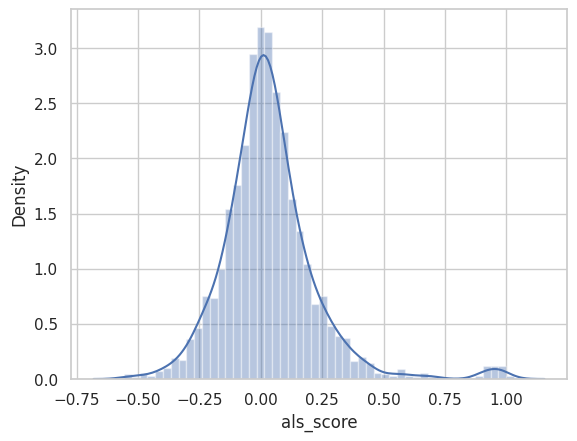

In [ ]:
# trim als_score range as reaching upto -inf
hybrid_output_1['als_score'] = hybrid_output_1['als_score'].apply(lambda x: x if x>-1 else 0)
sns.distplot(hybrid_output_1['als_score'])

In [ ]:
hybrid_output_1.describe()

,als_score,score
count,2180.000000,2180.000000
mean,0.033145,0.029378
std,0.192881,0.047415
min,-0.557139,0.000000
25%,-0.071906,0.010931
50%,0.016161,0.018591
75%,0.111007,0.029971
max,1.031115,0.602842


In [ ]:
# normalize als_score
hybrid_output_1['als_score_normalized'] = (hybrid_output_1['als_score']-min(hybrid_output_1['als_score'])) / (max(hybrid_output_1['als_score']) - min(hybrid_output_1['als_score']))

In [ ]:
hybrid_output_1['final_score'] = (hybrid_output_1['als_score_normalized'] + hybrid_output_1['score'])/2

In [ ]:
hybrid_output_1 = hybrid_output_1[['title','final_score']]

In [ ]:
hybrid_output_1.head()

,title,final_score
0,The brilliant mechanics of Pokémon Go,0.508088
1,How to Get a Job at Google,0.498746
2,"Netflix says Geography, Age, and Gender are ""Garbage"" for Predicting Taste",0.493588
3,Google is testing a new Material Design layout for desktop searches,0.490568
4,The real reasons you procrastinate - and how to stop,0.491751


In [ ]:
hybrid_output_1.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
67,Dries Buytaert: Advancing Drupal's web services,0.605768
32,14 Cool Drupal 8 modules for site builders | August 2016,0.564917
0,The brilliant mechanics of Pokémon Go,0.508088
1,How to Get a Job at Google,0.498746
6,"A sneak peek at Google's upcoming travel app, Trips",0.495691
7,Mobile marketing statistics 2016,0.495103
5,A step-by-step guide to agile growth experiments,0.494090
2,"Netflix says Geography, Age, and Gender are ""Garbage"" for Predicting Taste",0.493588
8,How Mature is Your Organization when it Comes to UX?,0.491882
4,The real reasons you procrastinate - and how to stop,0.491751


### Content + ALS

In [ ]:
collab_output = get_collab_output(20)
als_output = news_recommendation_als(20)

In [ ]:
hybrid_output_2 = pd.merge(als_output, collab_output, how='left', on='title')

In [ ]:
hybrid_output_2 = hybrid_output_2.dropna()
hybrid_output_2.head()

,title,als_score,item_id_sequence,score,item_id
0,The brilliant mechanics of Pokémon Go,1.031115,485.0,0.108207,1.356222e+18
1,How to Get a Job at Google,1.005608,116.0,0.105018,5.338677e+18
2,"Netflix says Geography, Age, and Gender are ""Garbage"" for Predicting Taste",0.986383,515.0,0.042053,4.814419e+18
3,Google is testing a new Material Design layout for desktop searches,0.985248,1531.0,0.027257,2.687654e+18
4,The real reasons you procrastinate - and how to stop,0.983758,1163.0,0.137278,-2.549933e+18


In [ ]:
hybrid_output_2.describe()

,als_score,item_id_sequence,score,item_id
count,2.259000e+03,2259.000000,2259.000000,2.259000e+03
mean,-inf,1550.372289,0.089372,1.373739e+17
std,inf,870.640091,0.132874,5.432011e+18
min,-3.402823e+38,0.000000,0.000000,-9.192549e+18
25%,-7.178936e-02,802.000000,0.000000,-4.651386e+18
50%,1.955435e-02,1537.000000,0.014645,2.079101e+17
75%,1.105473e-01,2342.000000,0.141770,4.966673e+18
max,1.031115e+00,2985.000000,0.672050,9.222265e+18


<ipython-input-268-e7f3af5d9417>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hybrid_output_2['als_score'])


<Axes: xlabel='als_score', ylabel='Density'>

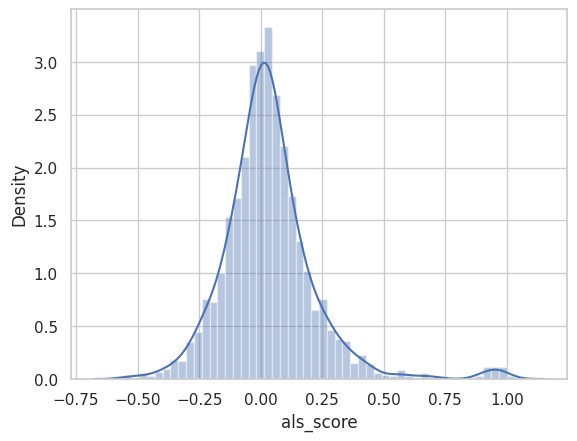

In [ ]:
hybrid_output_2['als_score'] = hybrid_output_2['als_score'].apply(lambda x: x if x>-1 else 0)
sns.distplot(hybrid_output_2['als_score'])

In [ ]:
hybrid_output_2.describe()

,als_score,item_id_sequence,score,item_id
count,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,0.033129,1550.372289,0.089372,1.373739e+17
std,0.190663,870.640091,0.132874,5.432011e+18
min,-0.557139,0.000000,0.000000,-9.192549e+18
25%,-0.069915,802.000000,0.000000,-4.651386e+18
50%,0.019554,1537.000000,0.014645,2.079101e+17
75%,0.110547,2342.000000,0.141770,4.966673e+18
max,1.031115,2985.000000,0.672050,9.222265e+18


In [ ]:
hybrid_output_2['als_score_normalized'] = (hybrid_output_2['als_score']-min(hybrid_output_2['als_score'])) / (max(hybrid_output_2['als_score']) - min(hybrid_output_2['als_score']))

In [ ]:
hybrid_output_2['final_score'] = (hybrid_output_2['als_score_normalized'] + hybrid_output_2['score'])/2

In [ ]:
hybrid_output_2 = hybrid_output_2[['title','final_score']]

In [ ]:
hybrid_output_2.head()

,title,final_score
0,The brilliant mechanics of Pokémon Go,0.554104
1,How to Get a Job at Google,0.544479
2,"Netflix says Geography, Age, and Gender are ""Garbage"" for Predicting Taste",0.506945
3,Google is testing a new Material Design layout for desktop searches,0.499189
4,The real reasons you procrastinate - and how to stop,0.553730


In [ ]:
# @title
hybrid_output_2.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
5,A step-by-step guide to agile growth experiments,0.627792
7,Mobile marketing statistics 2016,0.582393
19,Chat Smarter with Allo,0.579539
134,Lightning Distribution for Drupal: Build Advanced Authoring Experiences in Drupal 8,0.567735
325,"There will be a Drupal 9, and here is why",0.566197
74,9 Non-Threatening Leadership Strategies for Women,0.556919
0,The brilliant mechanics of Pokémon Go,0.554104
4,The real reasons you procrastinate - and how to stop,0.553730
25,Artificial Intelligence's White Guy Problem,0.550487
18,Google is quietly recording everything you say. Here's how to hear it,0.545278
